###  import library

In [1]:
!python -m pip install --user --upgrade pip

In [2]:
!pip install statsmodels

In [99]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

### Data  Loading[(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated(회원가입 안하고 자전거 빌린 유저수)
- registered - number of registered user rentals initiated(회원가입하고 자전거 빌린 유저수)
- count - number of total rentals(자전거빌린 유저 수)

In [100]:
location = './data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


## Feature Engineering : 데이터에서 시게열 패턴 추출하기

In [5]:
raw_all.shape

(17379, 12)

In [6]:
raw_all.ndim

2

In [7]:
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


In [8]:
raw_all.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61
17378,2012-12-31 23:00,1,0,1,1,10.66,13.63,65,9.00,12,37,49


In [9]:
raw_all.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,"17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00"
mean,2.50,0.03,0.68,1.43,20.38,23.79,62.72,12.74,35.68,153.79,189.46
std,1.11,0.17,0.47,0.64,7.89,8.59,19.29,8.20,49.31,151.36,181.39
min,1.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,48.00,7.00,4.00,34.00,40.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,63.00,13.00,17.00,115.00,142.00
75%,3.00,0.00,1.00,2.00,27.06,31.06,78.00,17.00,48.00,220.00,281.00
max,4.00,1.00,1.00,4.00,41.00,50.00,100.00,57.00,367.00,886.00,977.00


In [10]:
raw_all.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,"17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00","17,379.00"
unique,17379,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2012-07-16 23:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,2.50,0.03,0.68,1.43,20.38,23.79,62.72,12.74,35.68,153.79,189.46
...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,1.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,1.00
25%,NaN,2.00,0.00,0.00,1.00,13.94,16.66,48.00,7.00,4.00,34.00,40.00
50%,NaN,3.00,0.00,1.00,1.00,20.50,24.24,63.00,13.00,17.00,115.00,142.00
75%,NaN,3.00,0.00,1.00,2.00,27.06,31.06,78.00,17.00,48.00,220.00,281.00


In [11]:
raw_all.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,17379,17379,2012-07-16 23:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,379.00",NaN,NaN,NaN,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,379.00",NaN,NaN,NaN,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,379.00",NaN,NaN,NaN,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,379.00",NaN,NaN,NaN,1.43,0.64,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...
humidity,"17,379.00",NaN,NaN,NaN,62.72,19.29,0.00,48.00,63.00,78.00,100.00
windspeed,"17,379.00",NaN,NaN,NaN,12.74,8.20,0.00,7.00,13.00,17.00,57.00
casual,"17,379.00",NaN,NaN,NaN,35.68,49.31,0.00,4.00,17.00,48.00,367.00
registered,"17,379.00",NaN,NaN,NaN,153.79,151.36,0.00,34.00,115.00,220.00,886.00


In [12]:
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


In [13]:
if 'datetime' in raw_all.columns:
    raw_all['datetime']= pd.to_datetime(raw_all['datetime'])
    raw_all['Datetime']= pd.to_datetime(raw_all['datetime'])
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  count       17379 non-null  int64         
 12  Datetime    17379 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.7 MB


In [14]:
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Datetime
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00


In [15]:
raw_all.index

RangeIndex(start=0, stop=17379, step=1)

In [16]:
raw_all.index.dtype

dtype('int64')

In [17]:
if raw_all.index.dtype =='int64':
    raw_all.set_index('Datetime',inplace=True)
raw_all

#raw_all.reset_index()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90


In [18]:
raw_all.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17379,17379,2011-02-24 22:00:00,1,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,379.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,379.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,379.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,379.00",NaN,NaT,NaN,NaT,NaT,1.43,0.64,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
humidity,"17,379.00",NaN,NaT,NaN,NaT,NaT,62.72,19.29,0.00,48.00,63.00,78.00,100.00
windspeed,"17,379.00",NaN,NaT,NaN,NaT,NaT,12.74,8.20,0.00,7.00,13.00,17.00,57.00
casual,"17,379.00",NaN,NaT,NaN,NaT,NaT,35.68,49.31,0.00,4.00,17.00,48.00,367.00
registered,"17,379.00",NaN,NaT,NaN,NaT,NaT,153.79,151.36,0.00,34.00,115.00,220.00,886.00


In [19]:
raw_all.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

In [20]:
raw_all.isnull().sum().sum()

0

In [21]:
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


In [22]:
raw_all.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
                   ...      
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
Length: 12, dtype: object

In [23]:
raw_all.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17379, freq=None)

In [24]:
# asfreq
raw_all.asfreq('H').index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17544, freq='H')

In [25]:
# 데이터 시간정보가 어디에서 비어있는지 체크 => 시간 정보 누락값을 NAN으로 채움
raw_all.asfreq('H').isnull().sum()

datetime      165
season        165
holiday       165
workingday    165
weather       165
             ... 
humidity      165
windspeed     165
casual        165
registered    165
count         165
Length: 12, dtype: int64

In [26]:
# 누락된 시간 값 표시
raw_all.asfreq('H')[raw_all.asfreq('H').isnull().sum(axis=1) > 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-02 05:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-03 02:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-03 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-04 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-05 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-30 12:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-11-08 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-11-29 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [27]:
raw_all.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17379, freq=None)

In [28]:
raw_all.asfreq('H')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,8.00,32.00,40.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,5.00,27.00,32.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,3.00,10.00,13.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1.00,0.00,1.00,2.00,10.66,12.88,60.00,11.00,11.00,108.00,119.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1.00,0.00,1.00,2.00,10.66,12.88,60.00,11.00,8.00,81.00,89.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1.00,0.00,1.00,1.00,10.66,12.88,60.00,11.00,7.00,83.00,90.00


In [29]:
raw_all.asfreq('D')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01,2011-01-01,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-02,2011-01-02,1.00,0.00,0.00,2.00,18.86,22.73,88.00,20.00,4.00,13.00,17.00
2011-01-03,2011-01-03,1.00,0.00,1.00,1.00,9.02,9.85,44.00,24.00,0.00,5.00,5.00
2011-01-04,2011-01-04,1.00,0.00,1.00,1.00,6.56,9.09,55.00,7.00,0.00,5.00,5.00
2011-01-05,2011-01-05,1.00,0.00,1.00,1.00,8.20,12.88,64.00,0.00,0.00,6.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1.00,0.00,1.00,3.00,10.66,11.37,87.00,20.00,0.00,3.00,3.00
2012-12-28,2012-12-28,1.00,0.00,1.00,2.00,9.84,12.12,60.00,11.00,3.00,22.00,25.00
2012-12-29,2012-12-29,1.00,0.00,0.00,2.00,9.84,12.12,70.00,0.00,1.00,25.00,26.00


In [30]:
raw_all.asfreq('W')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-02,2011-01-02,1.00,0.00,0.00,2.00,18.86,22.73,88.00,20.00,4.00,13.00,17.00
2011-01-09,2011-01-09,1.00,0.00,0.00,1.00,4.10,3.79,42.00,26.00,1.00,24.00,25.00
2011-01-16,2011-01-16,1.00,0.00,0.00,1.00,10.66,15.15,56.00,0.00,6.00,33.00,39.00
2011-01-23,2011-01-23,1.00,0.00,0.00,1.00,1.64,3.79,57.00,7.00,2.00,20.00,22.00
2011-01-30,2011-01-30,1.00,0.00,0.00,1.00,6.56,9.09,80.00,7.00,0.00,33.00,33.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-02,2012-12-02,4.00,0.00,0.00,2.00,12.30,15.91,87.00,6.00,9.00,108.00,117.00
2012-12-09,2012-12-09,4.00,0.00,0.00,2.00,16.40,20.45,87.00,9.00,15.00,103.00,118.00
2012-12-16,2012-12-16,4.00,0.00,0.00,2.00,14.76,18.94,62.00,0.00,8.00,102.00,110.00


In [31]:
raw_all.asfreq('H')[raw_all.asfreq('H').isnull().sum(axis=1) > 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-02 05:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-03 02:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-03 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-04 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-05 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-30 12:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-11-08 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-11-29 03:00:00,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [32]:
raw_all.asfreq('H').head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,8.00,32.00,40.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,5.00,27.00,32.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,3.00,10.00,13.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-04 23:00:00,2011-01-04 23:00:00,1.00,0.00,1.00,1.00,8.20,11.37,69.00,6.00,2.00,9.00,11.00
2011-01-05 00:00:00,2011-01-05 00:00:00,1.00,0.00,1.00,1.00,8.20,12.88,64.00,0.00,0.00,6.00,6.00
2011-01-05 01:00:00,2011-01-05 01:00:00,1.00,0.00,1.00,1.00,6.56,9.85,74.00,6.00,0.00,6.00,6.00


In [33]:
# setting frequeny of time series data
raw_all = raw_all.asfreq('H', method='ffill')
raw_all.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

In [34]:
raw_all.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17544, freq='H')

In [35]:
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


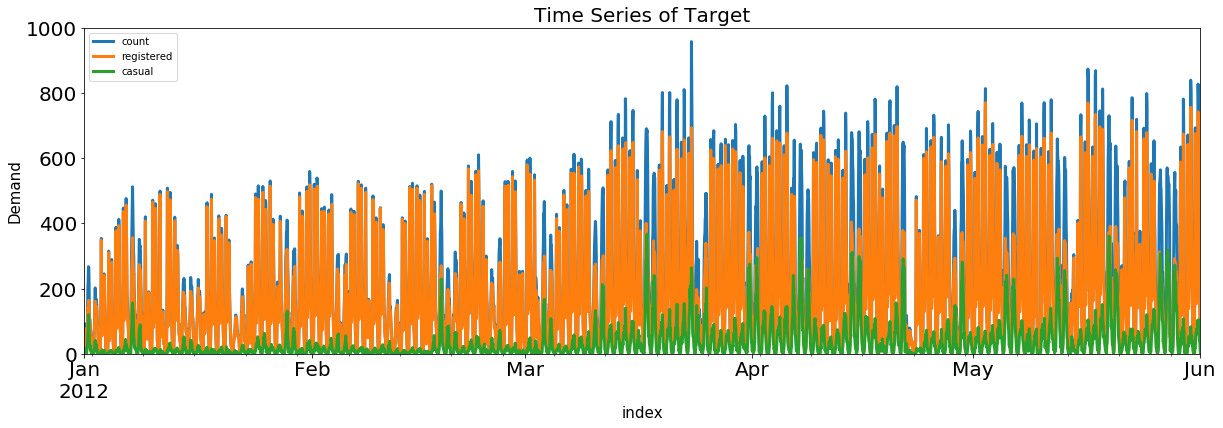

In [36]:
raw_all[['count','registered','casual']].plot(kind='line',figsize=(20,6),linewidth=3, 
                                              fontsize=20,xlim=('2012-01-01','2012-06-01'),ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

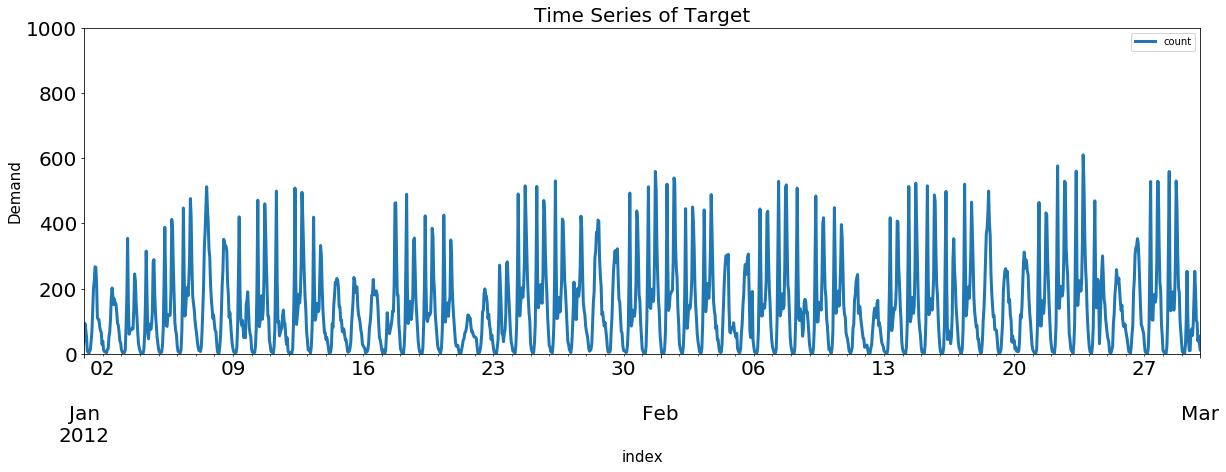

In [37]:
raw_all[['count']].plot(kind='line',figsize=(20,6),linewidth=3, 
                                              fontsize=20,xlim=('2012-01-01','2012-03-01'),ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

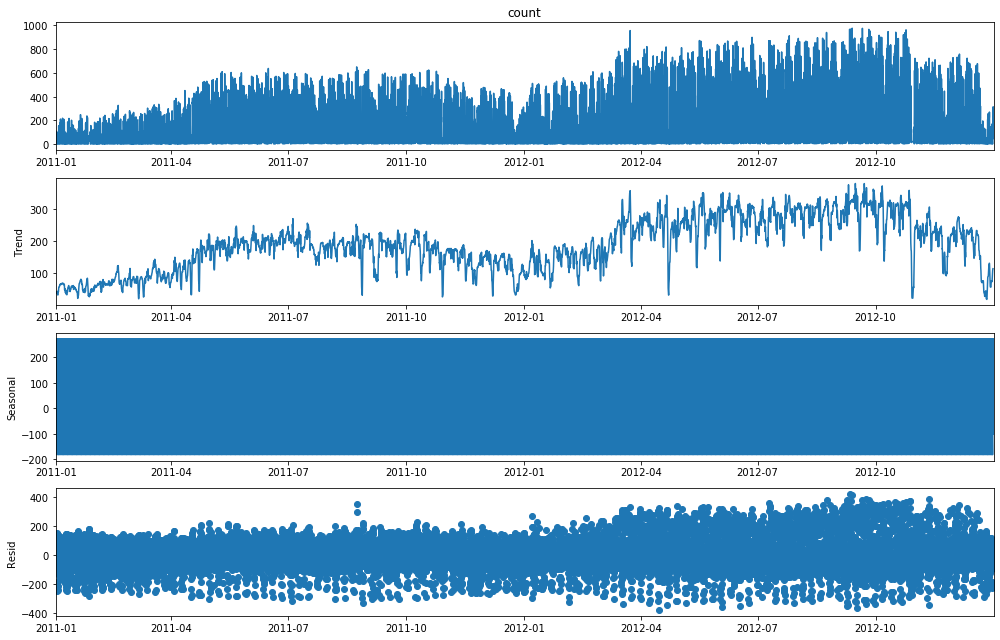

In [38]:
# 트렌드, 시즈널, 잔차로 데이터 분리하기
plt.rcParams['figure.figsize'] = (14,9)
sm.tsa.seasonal_decompose(raw_all['count'],model='additive').plot() # addtive 트렌드와 시즈널 잔차가 더하기로 이루어져 있을 것이다.
plt.show()

In [39]:
result = sm.tsa.seasonal_decompose(raw_all['count'],model='addtive')
result.observed

Datetime
2011-01-01 00:00:00    16.00
2011-01-01 01:00:00    40.00
2011-01-01 02:00:00    32.00
2011-01-01 03:00:00    13.00
2011-01-01 04:00:00     1.00
                       ...  
2012-12-31 19:00:00   119.00
2012-12-31 20:00:00    89.00
2012-12-31 21:00:00    90.00
2012-12-31 22:00:00    61.00
2012-12-31 23:00:00    49.00
Freq: H, Name: count, Length: 17544, dtype: float64

In [40]:
result.trend[:20] # 초기 처음의 몇 개 의 값을 이용해 트렌드를 계산하는데 사용

Datetime
2011-01-01 00:00:00     nan
2011-01-01 01:00:00     nan
2011-01-01 02:00:00     nan
2011-01-01 03:00:00     nan
2011-01-01 04:00:00     nan
                       ... 
2011-01-01 15:00:00   39.02
2011-01-01 16:00:00   38.92
2011-01-01 17:00:00   39.00
2011-01-01 18:00:00   39.04
2011-01-01 19:00:00   39.00
Freq: H, Name: trend, Length: 20, dtype: float64

In [41]:
((result.observed - result.trend - result.resid) == result.resid).sum()

0

In [42]:
result = sm.tsa.seasonal_decompose(raw_all['count'],model='addtive')
pd.DataFrame(result.resid).describe()

,resid
count,"17,520.00"
mean,-0.01
std,99.68
min,-377.73
25%,-61.00
50%,-6.01
75%,54.86
max,418.44


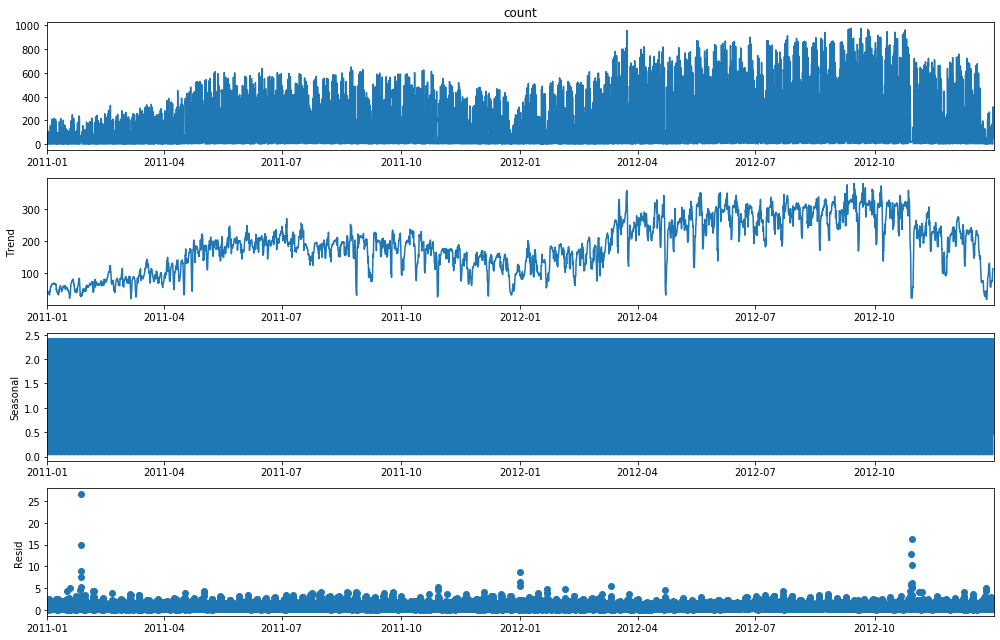

In [43]:
result = sm.tsa.seasonal_decompose(raw_all['count'],model='multiplicative').plot()
plt.show() # 결과 값이 퍼센트 일 경우 모델이 곱하기일 수도 있다.

In [44]:
result = sm.tsa.seasonal_decompose(raw_all['count'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend[:20]

,trend
Datetime,
2011-01-01 00:00:00,nan
2011-01-01 01:00:00,nan
2011-01-01 02:00:00,nan
2011-01-01 03:00:00,nan
2011-01-01 04:00:00,nan
...,...
2011-01-01 15:00:00,39.02
2011-01-01 16:00:00,38.92
2011-01-01 17:00:00,39.00


In [45]:
Y_trend.fillna(method='ffill',inplace=True)
Y_trend.fillna(method='bfill',inplace=True)
Y_trend[:20]

,trend
Datetime,
2011-01-01 00:00:00,41.06
2011-01-01 01:00:00,41.06
2011-01-01 02:00:00,41.06
2011-01-01 03:00:00,41.06
2011-01-01 04:00:00,41.06
...,...
2011-01-01 15:00:00,39.02
2011-01-01 16:00:00,38.92
2011-01-01 17:00:00,39.00


In [46]:
Y_trend.columns = ['count_trend']
Y_trend

,count_trend
Datetime,
2011-01-01 00:00:00,41.06
2011-01-01 01:00:00,41.06
2011-01-01 02:00:00,41.06
2011-01-01 03:00:00,41.06
2011-01-01 04:00:00,41.06
...,...
2012-12-31 19:00:00,113.71
2012-12-31 20:00:00,113.71
2012-12-31 21:00:00,113.71


In [47]:
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill',inplace=True)
Y_seasonal.fillna(method='bfill',inplace=True)
Y_seasonal.columns = ['count_seasonal']

Y_seasonal

,count_seasonal
Datetime,
2011-01-01 00:00:00,-134.25
2011-01-01 01:00:00,-154.75
2011-01-01 02:00:00,-165.27
2011-01-01 03:00:00,-176.48
2011-01-01 04:00:00,-181.67
...,...
2012-12-31 19:00:00,122.70
2012-12-31 20:00:00,37.48
2012-12-31 21:00:00,-16.10


In [48]:
pd.concat([raw_all,Y_trend,Y_seasonal],axis = 1).isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
                 ..
casual            0
registered        0
count             0
count_trend       0
count_seasonal    0
Length: 14, dtype: int64

In [49]:
if 'count_trend' not in raw_all.columns:
    if 'count_seasonal' not in raw_all.columns:
        raw_all = pd.concat([raw_all,Y_trend,Y_seasonal],axis = 1)

In [50]:
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal
Datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10


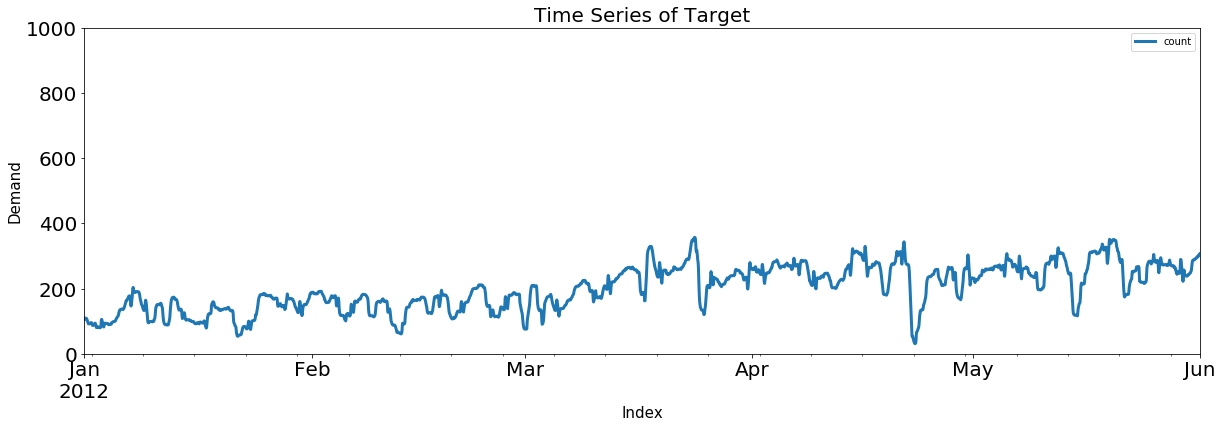

In [51]:
# moving average : 주변의 값으로 평균을 계산한다.
raw_all[['count']].rolling(24).mean().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                             xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

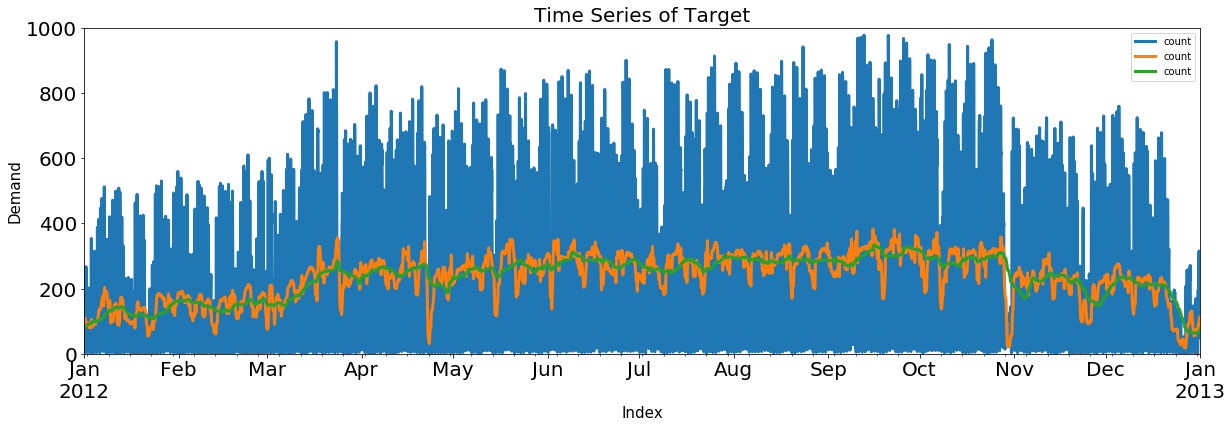

In [52]:
# comparison of several moving average values
pd.concat([raw_all[['count']], # 시간정보
           raw_all[['count']].rolling(24).mean(), # 일정보
           raw_all[['count']].rolling(24*7).mean()], axis=1).plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                                                  xlim=('2012-01-01', '2013-01-01'), ylim=(0,1000)) # 주일정보
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


In [53]:
# fill nan as some values and merging
Y_count_Day = raw_all[['count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True)
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']
Y_count_Week = raw_all[['count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']
if 'count_Day' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Day], axis=1)
if 'count_Week' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_count_Week], axis=1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week
Datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10


In [54]:
raw_all[['count']]

,count
Datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-31 19:00:00,119
2012-12-31 20:00:00,89
2012-12-31 21:00:00,90


In [55]:
raw_all[['count']].diff()

,count
Datetime,
2011-01-01 00:00:00,nan
2011-01-01 01:00:00,24.00
2011-01-01 02:00:00,-8.00
2011-01-01 03:00:00,-19.00
2011-01-01 04:00:00,-12.00
...,...
2012-12-31 19:00:00,-3.00
2012-12-31 20:00:00,-30.00
2012-12-31 21:00:00,1.00


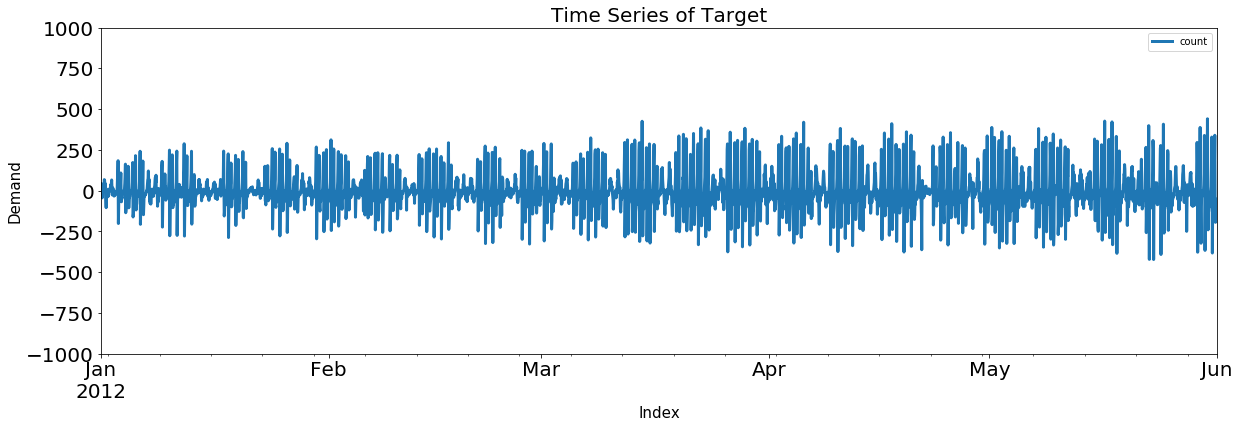

In [56]:
# line plot of Y for specific periods
raw_all[['count']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                 xlim=('2012-01-01', '2012-06-01'), ylim=(-1000,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [58]:
# diff of Y and merging
Y_diff = raw_all[['count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']
if 'count_diff' not in raw_all.columns:
    raw_all = pd.concat([raw_all, Y_diff], axis=1)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff
Datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00


In [98]:
# slt values as some group
raw_all['temp_group'] = pd.cut(raw_all['temp'],10)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayWeek,count_leg1,count_leg2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


In [63]:
raw_all['temp_group'].unique()

[(8.856, 12.874], (4.838, 8.856], (12.874, 16.892], (16.892, 20.91], (0.78, 4.838], (20.91, 24.928], (24.928, 28.946], (28.946, 32.964], (32.964, 36.982], (36.982, 41.0]]
Categories (10, interval[float64]): [(0.78, 4.838] < (4.838, 8.856] < (8.856, 12.874] < (12.874, 16.892] ... (24.928, 28.946] < (28.946, 32.964] < (32.964, 36.982] < (36.982, 41.0]]

In [64]:
raw_all['temp_group'].dtype

CategoricalDtype(categories=[(0.78, 4.838], (4.838, 8.856], (8.856, 12.874], (12.874, 16.892], (16.892, 20.91], (20.91, 24.928], (24.928, 28.946], (28.946, 32.964], (32.964, 36.982], (36.982, 41.0]],
              ordered=True)

In [66]:
raw_all.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaN,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaN,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
count_seasonal,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.00,128.50,-181.67,-117.81,21.32,64.69,273.37
count_Day,"17,544.00",NaN,NaN,NaN,NaT,NaT,187.74,80.25,18.04,130.29,188.48,247.42,382.50
count_Week,"17,544.00",NaN,NaN,NaN,NaT,NaT,187.67,73.12,45.95,137.19,185.83,254.88,332.99
count_diff,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.00,100.90,-523.00,-39.00,-4.00,30.00,519.00


In [67]:
raw_all.isnull().sum().sum()

0

In [69]:
# 시간 정보 추출하기
raw_all['Year']=raw_all.datetime.dt.year
raw_all['Quater'] = raw_all.datetime.dt.quarter
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater
Datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00,"(8.856, 12.874]",2012,4
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00,"(8.856, 12.874]",2012,4
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00,"(8.856, 12.874]",2012,4


In [70]:
raw_all.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,Year,Quater
count,"17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00","17,544.00"
mean,2.50,0.03,0.68,1.43,20.30,23.71,62.87,12.81,35.35,152.44,187.80,187.79,0.00,187.74,187.67,0.00,"2,011.50",2.51
std,1.11,0.17,0.47,0.65,7.92,8.62,19.34,8.29,49.19,151.28,181.35,80.16,128.50,80.25,73.12,100.90,0.50,1.12
min,1.00,0.00,0.00,1.00,0.82,0.00,0.00,0.00,0.00,0.00,1.00,18.06,-181.67,18.04,45.95,-523.00,"2,011.00",1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,48.00,7.00,4.00,32.00,38.00,130.56,-117.81,130.29,137.19,-39.00,"2,011.00",2.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,63.00,13.00,16.00,114.00,140.00,188.47,21.32,188.48,185.83,-4.00,"2,012.00",3.00
75%,3.00,0.00,1.00,2.00,27.06,31.06,79.00,17.00,48.00,219.00,279.00,247.46,64.69,247.42,254.88,30.00,"2,012.00",4.00
max,4.00,1.00,1.00,4.00,41.00,50.00,100.00,57.00,367.00,886.00,977.00,379.06,273.37,382.50,332.99,519.00,"2,012.00",4.00


In [71]:
raw_all['Quater_ver2'] = raw_all['Quater'] + (raw_all.Year - raw_all.Year.min())*4

In [73]:
raw_all.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,119,113.71,122.70,110.17,73.30,-3.00,"(8.856, 12.874]",2012,4,8
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,89,113.71,37.48,110.88,73.70,-30.00,"(8.856, 12.874]",2012,4,8
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,90,113.71,-16.10,112.67,74.10,1.00,"(8.856, 12.874]",2012,4,8
2012-12-31 22:00:00,2012-12-31 22:00:00,1,0,1,1,10.66,13.63,56,9.00,13,...,61,113.71,-56.94,113.71,74.39,-29.00,"(8.856, 12.874]",2012,4,8
2012-12-31 23:00:00,2012-12-31 23:00:00,1,0,1,1,10.66,13.63,65,9.00,12,...,49,113.71,-100.31,113.71,74.62,-12.00,"(8.856, 12.874]",2012,4,8


In [74]:
# feature extraction of time information)시간정보 넣기
raw_all['Month'] = raw_all.datetime.dt.month
raw_all['Day'] = raw_all.datetime.dt.day
raw_all['Hour'] = raw_all.datetime.dt.hour
raw_all['DayWeek'] = raw_all.datetime.dt.dayofweek
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayWeek
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,56.11,24.00,"(8.856, 12.874]",2011,1,1,1,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,56.11,24.00,"(8.856, 12.874]",2011,1,1,1,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,56.11,-8.00,"(8.856, 12.874]",2011,1,1,1,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,56.11,-19.00,"(8.856, 12.874]",2011,1,1,1,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,56.11,-12.00,"(8.856, 12.874]",2011,1,1,1,1,4,5


In [75]:
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        17544 non-null  datetime64[ns]
 1   season          17544 non-null  int64         
 2   holiday         17544 non-null  int64         
 3   workingday      17544 non-null  int64         
 4   weather         17544 non-null  int64         
 5   temp            17544 non-null  float64       
 6   atemp           17544 non-null  float64       
 7   humidity        17544 non-null  int64         
 8   windspeed       17544 non-null  float64       
 9   casual          17544 non-null  int64         
 10  registered      17544 non-null  int64         
 11  count           17544 non-null  int64         
 12  count_trend     17544 non-null  float64       
 13  count_seasonal  17544 non-null  float64       
 14  count_Day  

In [76]:
raw_all.describe().T

,count,mean,std,min,25%,50%,75%,max
season,"17,544.00",2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",1.43,0.65,1.00,1.00,1.00,2.00,4.00
temp,"17,544.00",20.30,7.92,0.82,13.94,20.50,27.06,41.00
...,...,...,...,...,...,...,...,...
Quater_ver2,"17,544.00",4.51,2.29,1.00,3.00,5.00,7.00,8.00
Month,"17,544.00",6.52,3.45,1.00,4.00,7.00,10.00,12.00
Day,"17,544.00",15.74,8.80,1.00,8.00,16.00,23.00,31.00
Hour,"17,544.00",11.51,6.94,0.00,5.00,12.00,17.25,23.00


In [78]:
# 지연값 추출
raw_all['count'].shift(1) # 1row만큼 데이터가 밀린다.(-값도 가능) 데이터가 오른차순일경우 + 내리차순일경우 - 를 사용

Datetime
2011-01-01 00:00:00      nan
2011-01-01 01:00:00    16.00
2011-01-01 02:00:00    40.00
2011-01-01 03:00:00    32.00
2011-01-01 04:00:00    13.00
                       ...  
2012-12-31 19:00:00   122.00
2012-12-31 20:00:00   119.00
2012-12-31 21:00:00    89.00
2012-12-31 22:00:00    90.00
2012-12-31 23:00:00    61.00
Freq: H, Name: count, Length: 17544, dtype: float64

In [79]:
raw_all['count_leg1'] = raw_all['count'].shift(1)
raw_all['count_leg2'] = raw_all['count'].shift(2)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayWeek,count_leg1,count_leg2
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,0,5,nan,nan
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,"(8.856, 12.874]",2011,1,1,1,1,1,5,16.00,nan
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,"(8.856, 12.874]",2011,1,1,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,"(8.856, 12.874]",2011,1,1,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,"(8.856, 12.874]",2012,4,8,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,"(8.856, 12.874]",2012,4,8,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,"(8.856, 12.874]",2012,4,8,12,31,21,0,89.00,119.00


In [80]:
raw_all['count_leg1'].fillna(method='bfill',inplace=True)
raw_all['count_leg2'].fillna(method='bfill',inplace=True)
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayWeek,count_leg1,count_leg2
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,0,5,16.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,"(8.856, 12.874]",2011,1,1,1,1,1,5,16.00,16.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,"(8.856, 12.874]",2011,1,1,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,"(8.856, 12.874]",2011,1,1,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,"(8.856, 12.874]",2011,1,1,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,"(8.856, 12.874]",2012,4,8,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,"(8.856, 12.874]",2012,4,8,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,"(8.856, 12.874]",2012,4,8,12,31,21,0,89.00,119.00


In [86]:
# 계절에 대하 더미 변수
pd.get_dummies(raw_all['Quater'])
pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy')
pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
pd.concat([raw_all, pd.get_dummies(raw_all['Quater'],prefix='Quater_Dummy',drop_first=True)], axis=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayWeek,count_leg1,count_leg2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


In [88]:
if 'Quater' in raw_all.columns:
    raw_all =pd.concat([raw_all, pd.get_dummies(raw_all['Quater'],prefix='Quater_Dummy',drop_first=True)], axis=1)
    del raw_all['Quater']
raw_all

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayWeek,count_leg1,count_leg2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


In [89]:
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Freq: H
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        17544 non-null  datetime64[ns]
 1   season          17544 non-null  int64         
 2   holiday         17544 non-null  int64         
 3   workingday      17544 non-null  int64         
 4   weather         17544 non-null  int64         
 5   temp            17544 non-null  float64       
 6   atemp           17544 non-null  float64       
 7   humidity        17544 non-null  int64         
 8   windspeed       17544 non-null  float64       
 9   casual          17544 non-null  int64         
 10  registered      17544 non-null  int64         
 11  count           17544 non-null  int64         
 12  count_trend     17544 non-null  float64       
 13  count_seasonal  17544 non-null  float64       
 14  count_Day  

In [92]:
[col for col in raw_all.columns if col !='temp_group']

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'count_trend',
 'count_seasonal',
 'count_Day',
 'count_Week',
 'count_diff',
 'Year',
 'Quater_ver2',
 'Month',
 'Day',
 'Hour',
 'DayWeek',
 'count_leg1',
 'count_leg2',
 'Quater_Dummy_2',
 'Quater_Dummy_3',
 'Quater_Dummy_4']

In [90]:
raw_all.loc[:, [col for col in raw_all.columns if col !='temp_group']]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayWeek,count_leg1,count_leg2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


# code summary

In [93]:
### Functinalize
### Feature engineering of default
def non_feature_engineering(raw):
    raw_nfe = raw.copy()
    if 'datetime' in raw_nfe.columns:
        raw_nfe['datetime'] = pd.to_datetime(raw_nfe['datetime'])
        raw_nfe['DateTime'] = pd.to_datetime(raw_nfe['datetime'])
    if raw_nfe.index.dtype == 'int64':
        raw_nfe.set_index('DateTime', inplace=True)
    # bring back
    # if raw_nfe.index.dtype != 'int64':
    #     raw_nfe.reset_index(drop=False, inplace=True)
    raw_nfe = raw_nfe.asfreq('H', method='ffill')
    return raw_nfe
# raw_rd = non_feature_engineering(raw_all)


### Feature engineering of all
def feature_engineering(raw):
    raw_fe = raw.copy()
    if 'datetime' in raw_fe.columns:
        raw_fe['datetime'] = pd.to_datetime(raw_fe['datetime'])
        raw_fe['DateTime'] = pd.to_datetime(raw_fe['datetime'])

    if raw_fe.index.dtype == 'int64':
        raw_fe.set_index('DateTime', inplace=True)

    raw_fe = raw_fe.asfreq('H', method='ffill')

    result = sm.tsa.seasonal_decompose(raw_fe['count'], model='additive')
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method='ffill', inplace=True)
    Y_trend.fillna(method='bfill', inplace=True)
    Y_trend.columns = ['count_trend']
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method='ffill', inplace=True)
    Y_seasonal.fillna(method='bfill', inplace=True)
    Y_seasonal.columns = ['count_seasonal']
    pd.concat([raw_fe, Y_trend, Y_seasonal], axis=1).isnull().sum()
    if 'count_trend' not in raw_fe.columns:
        if 'count_seasonal' not in raw_fe.columns:
            raw_fe = pd.concat([raw_fe, Y_trend, Y_seasonal], axis=1)

    Y_count_Day = raw_fe[['count']].rolling(24).mean()
    Y_count_Day.fillna(method='ffill', inplace=True)
    Y_count_Day.fillna(method='bfill', inplace=True)
    Y_count_Day.columns = ['count_Day']
    Y_count_Week = raw_fe[['count']].rolling(24*7).mean()
    Y_count_Week.fillna(method='ffill', inplace=True)
    Y_count_Week.fillna(method='bfill', inplace=True)
    Y_count_Week.columns = ['count_Week']
    if 'count_Day' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_count_Day], axis=1)
    if 'count_Week' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_count_Week], axis=1)

    Y_diff = raw_fe[['count']].diff()
    Y_diff.fillna(method='ffill', inplace=True)
    Y_diff.fillna(method='bfill', inplace=True)
    Y_diff.columns = ['count_diff']
    if 'count_diff' not in raw_fe.columns:
        raw_fe = pd.concat([raw_fe, Y_diff], axis=1)

    raw_fe['temp_group'] = pd.cut(raw_fe['temp'], 10)
    raw_fe['Year'] = raw_fe.datetime.dt.year
    raw_fe['Quater'] = raw_fe.datetime.dt.quarter
    raw_fe['Quater_ver2'] = raw_fe['Quater'] + (raw_fe.Year - raw_fe.Year.min()) * 4
    raw_fe['Month'] = raw_fe.datetime.dt.month
    raw_fe['Day'] = raw_fe.datetime.dt.day
    raw_fe['Hour'] = raw_fe.datetime.dt.hour
    raw_fe['DayofWeek'] = raw_fe.datetime.dt.dayofweek

    raw_fe['count_lag1'] = raw_fe['count'].shift(1)
    raw_fe['count_lag2'] = raw_fe['count'].shift(2)
    raw_fe['count_lag1'].fillna(method='bfill', inplace=True)
    raw_fe['count_lag2'].fillna(method='bfill', inplace=True)

    if 'Quater' in raw_fe.columns:
        if 'Quater_Dummy' not in ['_'.join(col.split('_')[:2]) for col in raw_fe.columns]:
            raw_fe = pd.concat([raw_fe, pd.get_dummies(raw_fe['Quater'], prefix='Quater_Dummy', drop_first=True)], axis=1)
            del raw_fe['Quater']
    return raw_fe
# raw_fe = feature_engineering(raw_all)

In [101]:
raw_nfe = non_feature_engineering(raw_all)

In [102]:
raw_fe = feature_engineering(raw_all)

In [103]:
raw_fe

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


# Data Split

In [104]:
raw_fe.isnull().sum().sum()

0

In [106]:
Y_colname = ['count']
X_remove = ['datetime','DateTime','temp_group','casual','registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
len(X_colname)


24

In [108]:
raw_train, raw_test = train_test_split(raw_fe, test_size = 0.2 , random_state= 123)
X_train,X_test, Y_train, Y_test = train_test_split(raw_fe[X_colname],raw_fe[Y_colname],test_size=0.2, random_state =123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
X_train

(14035, 24) (14035, 1)
(3509, 24) (3509, 1)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count_trend,count_seasonal,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-10-13 06:00:00,4,0,1,3,22.14,25.76,100,6.00,107.25,-112.33,...,4,10,13,6,3,17.00,7.00,0,0,1
2011-01-16 00:00:00,1,0,0,1,10.66,15.15,56,0.00,54.31,-134.25,...,1,1,16,0,6,44.00,26.00,0,0,0
2012-08-19 13:00:00,3,0,0,3,26.24,28.79,83,9.00,180.31,65.21,...,7,8,19,13,6,298.00,272.00,0,1,0
2012-07-10 18:00:00,3,0,1,3,28.70,33.34,74,15.00,260.67,236.38,...,7,7,10,18,1,872.00,435.00,0,1,0
2011-05-18 09:00:00,2,0,1,3,22.96,26.52,83,17.00,161.56,30.51,...,2,5,18,9,2,453.00,274.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-05 00:00:00,1,0,1,1,8.20,12.88,64,0.00,66.48,-134.25,...,1,1,5,0,2,11.00,35.00,0,0,0
2012-07-13 19:00:00,3,0,1,1,30.34,33.34,51,11.00,311.67,122.70,...,7,7,13,19,4,631.00,835.00,0,1,0
2011-11-20 11:00:00,4,0,0,2,20.50,24.24,63,7.00,148.02,19.32,...,4,11,20,11,6,229.00,138.00,0,0,1


In [109]:
raw_train = raw_fe.loc[raw_fe.index<'2012-07-01',:]
raw_test = raw_fe.loc[raw_fe.index>= '2012-07-01',:]
print(raw_train.shape, raw_test.shape)

(13128, 29) (4416, 29)


In [110]:
Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13128, 24) (13128, 1)
(4416, 24) (4416, 1)


# Code Summary

In [111]:
### Functionalize
### Data split of cross sectional
def datasplit_cs(raw, Y_colname, X_colname, test_size, random_seed=123):
    X_train, X_test, Y_train, Y_test = train_test_split(raw[X_colname], raw[Y_colname], test_size=test_size, random_state=random_seed)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_cs(raw_fe, Y_colname, X_colname, 0.2)


### Data split of time series
def datasplit_ts(raw, Y_colname, X_colname, criteria):
    raw_train = raw.loc[raw.index < criteria,:]
    raw_test = raw.loc[raw.index >= criteria,:]
    Y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    Y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    print('Train_size:', raw_train.shape, 'Test_size:', raw_test.shape)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)
    return X_train, X_test, Y_train, Y_test
# X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

In [112]:
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train, X_test, Y_train, Y_test = datasplit_ts(raw_fe, Y_colname, X_colname, '2012-07-01')

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)


## Applying Base Model

In [113]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
season,"13,128.00",2.20,1.05,1.00,1.00,2.00,3.00,4.00
holiday,"13,128.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"13,128.00",0.68,0.46,0.00,0.00,1.00,1.00,1.00
weather,"13,128.00",1.43,0.66,1.00,1.00,1.00,2.00,4.00
temp,"13,128.00",19.66,7.87,0.82,13.12,19.68,26.24,40.18
...,...,...,...,...,...,...,...,...
count_lag1,"13,128.00",166.20,160.76,1.00,33.00,123.00,244.00,957.00
count_lag2,"13,128.00",166.18,160.77,1.00,33.00,123.00,244.00,957.00
Quater_Dummy_2,"13,128.00",0.33,0.47,0.00,0.00,0.00,1.00,1.00
Quater_Dummy_3,"13,128.00",0.17,0.37,0.00,0.00,0.00,0.00,1.00


In [115]:
fit_reg1 = sm.OLS(Y_train,X_train).fit()
fit_reg1.summary()
# 해석
# 시계열 선형 회귀 공부하기[3장]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:06:09   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday            0.0083      0.014      0.612      0.540      -0.018       0.035
workingday         0.0079      0.007      1.184      0.236      -0.005       0.021
weather            0.0042      0.003      1.232      0.218      -0.003       0.011
temp               0.0022      0.002      1.075      0.282      -0.002       0.006
atemp             -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity          -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed          0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend     9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal  1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_Day       4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_Week     -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.547e-05   7.97e-06     -1.939      0.052   -3.11e-05    1.66e-07
Quater_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
Month              0.0026      0.002      1.051      0.293      -0.002       0.007
Day                0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour               0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek          0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quater_Dummy_2    -0.0010      0.009     -0.115      0.909      -0.019       0.017
Quater_Dummy_3    -0.0037      0.017     -0.220      0.826      -0.037       0.030
Quater_Dummy_4    -0.0132      0.026     -0.512      0.609      -0.064       0.037
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.832
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
pred_tr_reg1 = fit_reg1.predict(X_train).values

In [118]:
pred_te_reg1 = fit_reg1.predict(X_test).values

In [119]:
pred_tr_reg1

array([ 39.95493987,  39.95523011,  31.95607896, ..., 212.999153  ,
       171.99963612, 151.99961269])

In [120]:
pred_te_reg1

array([148.97486386,  92.98079744,  89.97770842, ...,  90.02087685,
        61.02007466,  49.01882264])

## 시각화

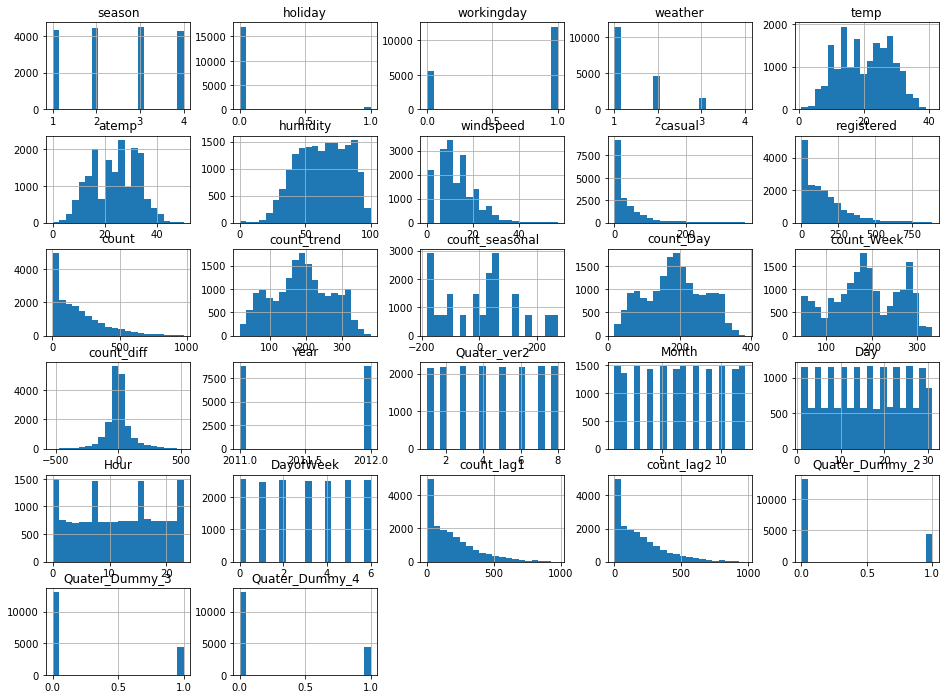

In [122]:
raw_fe.hist(bins=20,grid=True,figsize=(16,12))
plt.show()

(0, 1000)

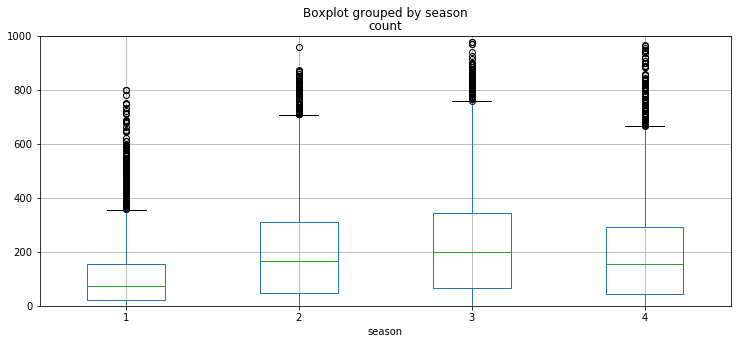

In [123]:
raw_fe.boxplot(column='count',by='season',grid=True, figsize=(12,5))
plt.ylim(0,1000)

(0, 1000)

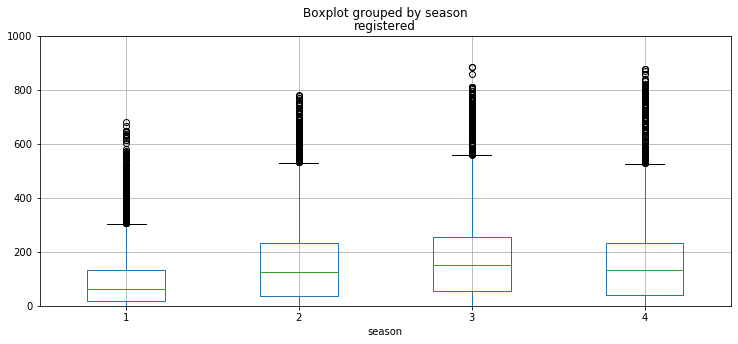

In [124]:
raw_fe.boxplot(column='registered',by='season',grid=True, figsize=(12,5))
plt.ylim(0,1000)

(0, 1000)

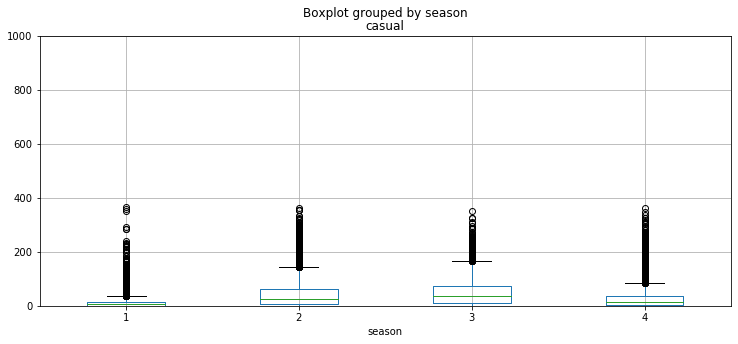

In [125]:
raw_fe.boxplot(column='casual',by='season',grid=True, figsize=(12,5))
plt.ylim(0,1000)

(0, 1000)

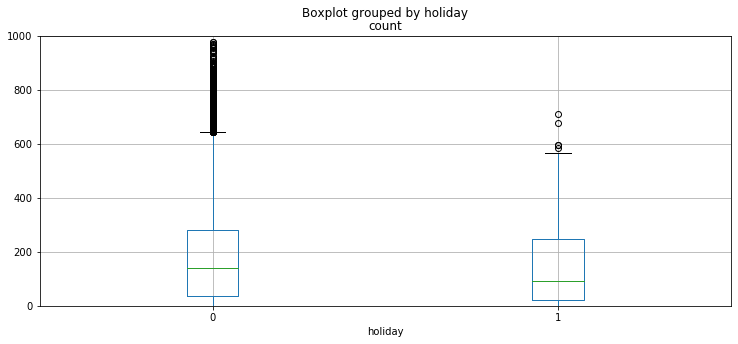

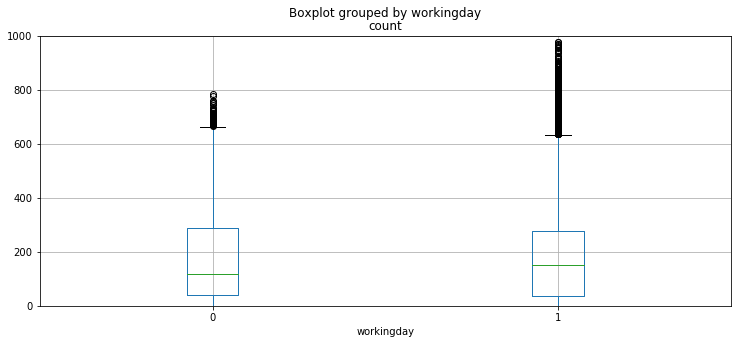

In [126]:
raw_fe.boxplot(column='count',by='holiday',grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='count',by='workingday',grid=True, figsize=(12,5))
plt.ylim(0,1000)

In [127]:
raw_all[raw_all.holiday ==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


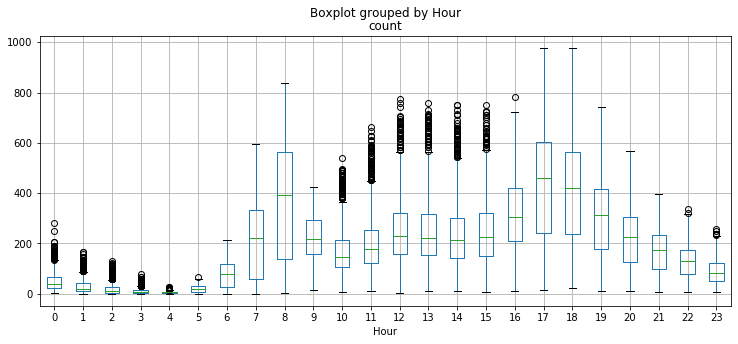

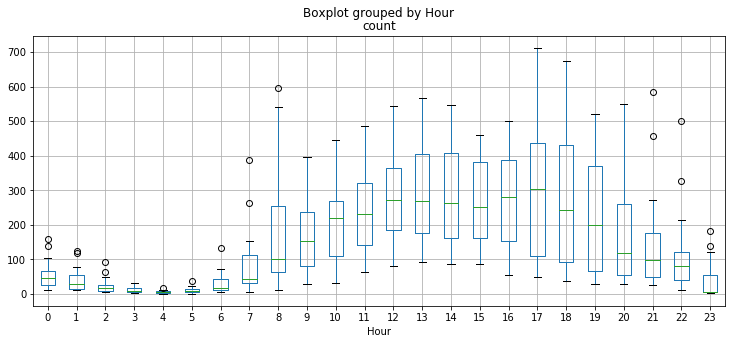

In [131]:
raw_fe[raw_fe.holiday == 0].boxplot(column='count', by='Hour',grid=True, figsize=(12,5))
plt.show()
raw_fe[raw_fe.holiday == 1].boxplot(column='count',by='Hour', grid=True, figsize=(12,5))
plt.show()

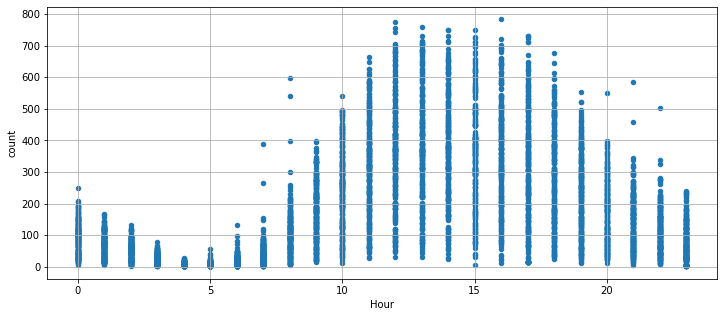

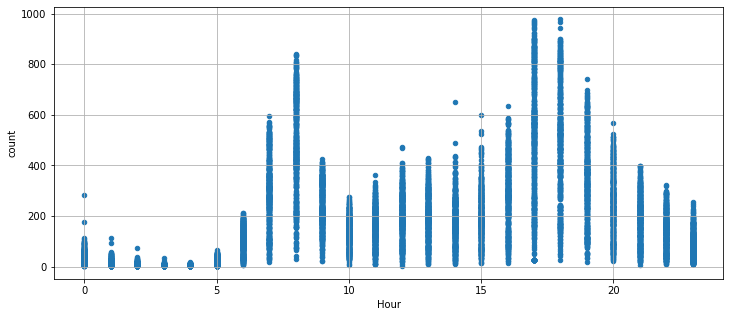

In [134]:
raw_fe[raw_fe.workingday == 0].plot.scatter(y='count', x='Hour',grid=True, figsize=(12,5), colormap='viridis')
plt.show()
raw_fe[raw_fe.workingday == 1].plot.scatter(y='count',x='Hour', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

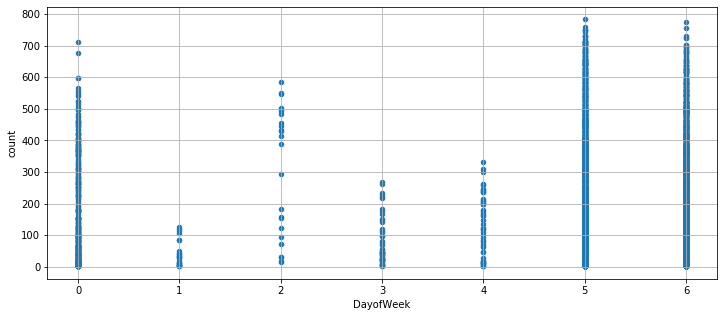

In [135]:
raw_fe[raw_fe.workingday == 0].plot.scatter(y='count', x='DayofWeek',grid=True, figsize=(12,5), colormap='viridis')
plt.show()

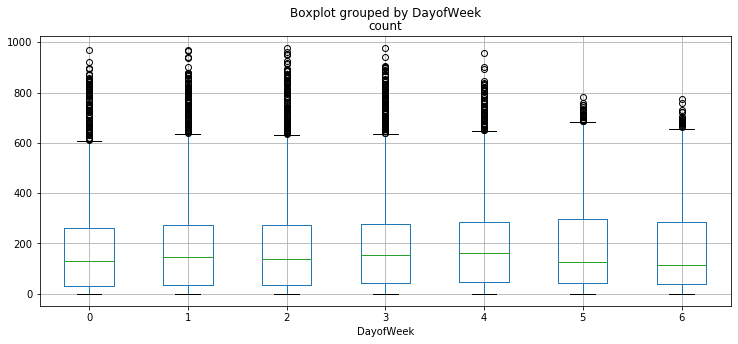

In [138]:
raw_fe.boxplot(column='count',by ='DayofWeek', grid=True, figsize=(12,5))
plt.show()

(0, 1000)

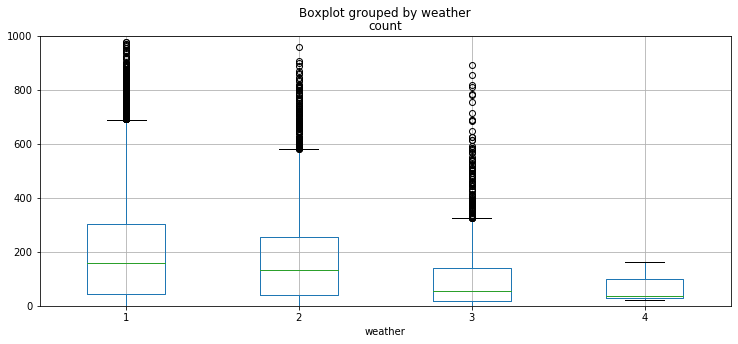

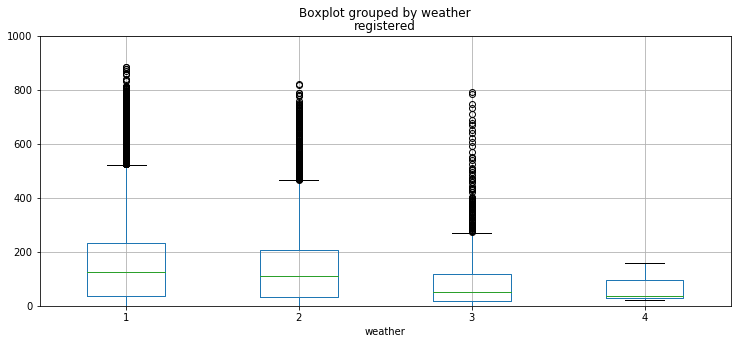

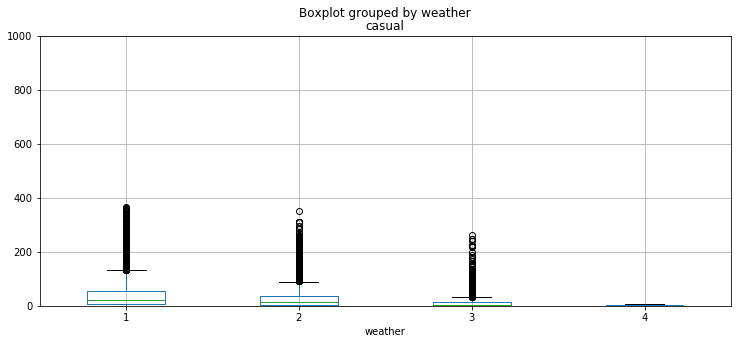

In [140]:
# box plot example
raw_fe.boxplot(column='count', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='registered', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='casual', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)

In [65]:
pd.concat([raw_fe.dtypes, raw_fe.describe(include='all').T], axis=1)

,0,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,datetime64[ns],17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quater_Dummy_2,uint8,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,0.00,1.00
Quater_Dummy_3,uint8,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,1.00,1.00
Quater_Dummy_4,uint8,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,1.00,1.00
DateTime,datetime64[ns],17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
raw_fe['weather'].value_counts()

1    11455
2     4563
3     1523
4        3
Name: weather, dtype: int64

In [67]:
raw_fe['weather'].value_counts().sum()

17544

In [68]:
pd.DataFrame(raw_fe['weather'].value_counts()/raw_fe['weather'].value_counts().sum()*100).T

,1,2,3,4
weather,65.29,26.01,8.68,0.02


In [69]:
pd.crosstab(index=raw_fe['count'], columns=raw_fe['weather'], margins=True)

weather,1,2,3,4,All
count,,,,,
1,100,45,27,0,172
2,136,59,37,0,232
3,136,66,41,0,243
4,149,62,36,0,247
5,164,63,36,0,263
...,...,...,...,...,...
968,1,0,0,0,1
970,1,0,0,0,1
976,1,0,0,0,1


In [70]:
# generate cross table
sub_table = pd.crosstab(index=raw_fe['count'], columns=raw_fe['weather'], margins=True)
sub_table/sub_table.loc['All']*100

weather,1,2,3,4,All
count,,,,,
1,0.87,0.99,1.77,0.00,0.98
2,1.19,1.29,2.43,0.00,1.32
3,1.19,1.45,2.69,0.00,1.39
4,1.30,1.36,2.36,0.00,1.41
5,1.43,1.38,2.36,0.00,1.50
...,...,...,...,...,...
968,0.01,0.00,0.00,0.00,0.01
970,0.01,0.00,0.00,0.00,0.01
976,0.01,0.00,0.00,0.00,0.01


In [71]:
raw_fe.groupby('weather').describe().T

weather              1        2        3    4
season count 11,455.00 4,563.00 1,523.00 3.00
       mean       2.51     2.49     2.45 1.00
       std        1.09     1.15     1.16 0.00
       min        1.00     1.00     1.00 1.00
       25%        2.00     1.00     1.00 1.00
...                ...      ...      ...  ...
Quater min        1.00     1.00     1.00 1.00
       25%        2.00     1.00     1.00 1.00
       50%        3.00     3.00     2.00 1.00
       75%        3.00     4.00     4.00 1.00
       max        4.00     4.00     4.00 1.00

[216 rows x 4 columns]

In [72]:
raw_fe.groupby(['weather', 'DayofWeek']).count()
raw_fe.groupby(['weather', 'DayofWeek']).mean()

season  holiday  workingday  temp  atemp  humidity  \
weather DayofWeek                                                       
1       0            2.45     0.14        0.86 20.70  24.23     59.05   
        1            2.48     0.00        1.00 21.36  24.89     57.11   
        2            2.50     0.01        0.99 21.61  25.08     58.23   
        3            2.53     0.03        0.97 21.35  24.88     55.85   
        4            2.56     0.03        0.97 20.71  24.00     57.06   
...                   ...      ...         ...   ...    ...       ...   
3       5            2.31     0.00        0.00 17.50  20.48     86.43   
        6            2.62     0.00        0.00 19.17  22.40     81.39   
4       0            1.00     0.00        1.00  8.20  11.37     86.00   
        2            1.00     0.00        1.00  9.02   9.85     93.00   
        5            1.00     0.00        0.00  5.74   6.82     86.00   

                   windspeed  casual  registered  count  ...  Quater_ver2  \
weather DayofWeek                                        ...                
1       0              12.86   30.40      160.04 190.43  ...         4.42   
        1              12.95   27.57      186.58 214.14  ...         4.48   
        2              12.22   26.65      181.52 208.17  ...         4.59   
        3              13.01   28.95      184.81 213.77  ...         4.64   
        4              12.73   33.50      168.64 202.14  ...         4.52   
...                      ...     ...         ...    ...  ...          ...   
3       5              18.08   26.43       70.57  97.00  ...         4.15   
        6              16.12   31.76       84.02 115.78  ...         4.87   
4       0               6.00    6.00      158.00 164.00  ...         5.00   
        2              22.00    1.00       35.00  36.00  ...         1.00   
        5              13.00    1.00       22.00  23.00  ...         5.00   

                   Month   Day  Hour  count_lag1  count_lag2  Quater_Dummy_2  \
weather DayofWeek                                                              
1       0           6.36 15.64 11.39      188.77      188.68            0.25   
        1           6.22 16.16 12.17      213.34      213.59            0.24   
        2           6.41 15.86 11.60      207.08      209.14            0.27   
        3           6.51 15.01 11.90      213.36      214.26            0.28   
        4           6.71 15.41 11.57      203.38      204.10            0.28   
...                  ...   ...   ...         ...         ...             ...   
3       5           5.71 16.32 12.18      109.89      120.54            0.21   
        6           6.46 14.36 13.77      143.89      166.62            0.25   
4       0           1.00  9.00 18.00      152.00       49.00            0.00   
        2           1.00 26.00 16.00       43.00       36.00            0.00   
        5           1.00 21.00  1.00       24.00       38.00            0.00   

                   Quater_Dummy_3  Quater_Dummy_4  Quater  
weather DayofWeek                                          
1       0                    0.27            0.22    2.46  
        1                    0.30            0.20    2.42  
        2                    0.30            0.20    2.47  
        3                    0.28            0.22    2.50  
        4                    0.25            0.26    2.57  
...                           ...             ...     ...  
3       5                    0.30            0.17    2.32  
        6                    0.28            0.25    2.54  
4       0                    0.00            0.00    1.00  
        2                    0.00            0.00    1.00  
        5                    0.00            0.00    1.00  

[24 rows x 26 columns]

In [73]:
# pivot table using groupby
raw_fe.groupby(['weather', 'DayofWeek']).describe()

season                                     holiday       \
                     count mean  std  min  25%  50%  75%  max    count mean   
weather DayofWeek                                                             
1       0         1,594.00 2.45 1.09 1.00 1.00 2.00 3.00 4.00 1,594.00 0.14   
        1         1,527.00 2.48 1.07 1.00 2.00 3.00 3.00 4.00 1,527.00 0.00   
        2         1,577.00 2.50 1.06 1.00 2.00 3.00 3.00 4.00 1,577.00 0.01   
        3         1,660.00 2.53 1.06 1.00 2.00 3.00 3.00 4.00 1,660.00 0.03   
        4         1,649.00 2.56 1.08 1.00 2.00 3.00 4.00 4.00 1,649.00 0.03   
...                    ...  ...  ...  ...  ...  ...  ...  ...      ...  ...   
3       5           201.00 2.31 1.04 1.00 1.00 2.00 3.00 4.00   201.00 0.00   
        6           170.00 2.62 1.08 1.00 2.00 3.00 4.00 4.00   170.00 0.00   
4       0             1.00 1.00  nan 1.00 1.00 1.00 1.00 1.00     1.00 0.00   
        2             1.00 1.00  nan 1.00 1.00 1.00 1.00 1.00     1.00 0.00   
        5             1.00 1.00  nan 1.00 1.00 1.00 1.00 1.00     1.00 0.00   

                   ... Quater_Dummy_4        Quater                           \
                   ...            75%  max    count mean  std  min  25%  50%   
weather DayofWeek  ...                                                         
1       0          ...           0.00 1.00 1,594.00 2.46 1.10 1.00 1.00 2.00   
        1          ...           0.00 1.00 1,527.00 2.42 1.08 1.00 1.00 2.00   
        2          ...           0.00 1.00 1,577.00 2.47 1.06 1.00 2.00 2.00   
        3          ...           0.00 1.00 1,660.00 2.50 1.07 1.00 2.00 2.00   
        4          ...           1.00 1.00 1,649.00 2.57 1.09 1.00 2.00 3.00   
...                ...            ...  ...      ...  ...  ...  ...  ...  ...   
3       5          ...           0.00 1.00   201.00 2.32 1.10 1.00 1.00 2.00   
        6          ...           0.00 1.00   170.00 2.54 1.10 1.00 2.00 3.00   
4       0          ...           0.00 0.00     1.00 1.00  nan 1.00 1.00 1.00   
        2          ...           0.00 0.00     1.00 1.00  nan 1.00 1.00 1.00   
        5          ...           0.00 0.00     1.00 1.00  nan 1.00 1.00 1.00   

                             
                   75%  max  
weather DayofWeek            
1       0         3.00 4.00  
        1         3.00 4.00  
        2         3.00 4.00  
        3         3.00 4.00  
        4         4.00 4.00  
...                ...  ...  
3       5         3.00 4.00  
        6         3.00 4.00  
4       0         1.00 1.00  
        2         1.00 1.00  
        5         1.00 1.00  

[24 rows x 208 columns]

In [74]:
# raw_fe.groupby(['weather', 'DayofWeek']).agg({'count':'mean'})
raw_fe.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]})

count          
                      sum  min  max
weather DayofWeek                  
1       0          303551    1  968
        1          326993    1  970
        2          328285    1  977
        3          354852    1  976
        4          333333    1  900
...                   ...  ...  ...
3       5           19498    1  584
        6           19683    1  626
4       0             164  164  164
        2              36   36   36
        5              23   23   23

[24 rows x 3 columns]

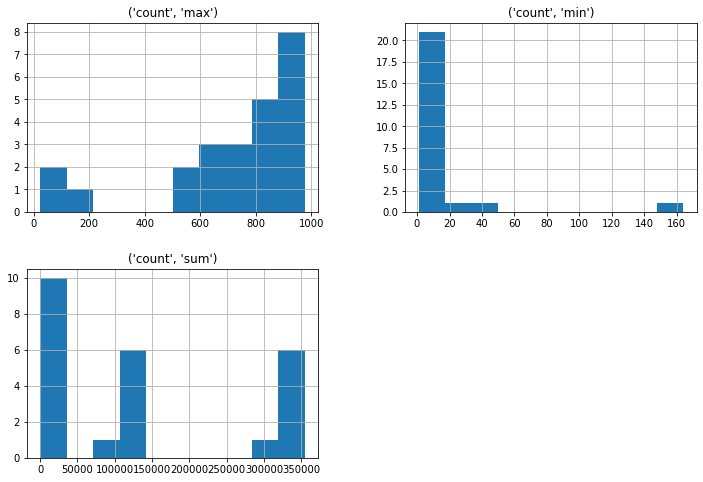

In [75]:
# groupby and histogram
raw_fe.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]}).hist(grid=True, figsize=(12,8))
plt.show()

In [76]:
# raw_fe.groupby('weather').groups.keys()
raw_fe.groupby('weather').groups.items()

dict_items([(1, DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 06:00:00',
               '2011-01-01 07:00:00', '2011-01-01 08:00:00',
               '2011-01-01 09:00:00', '2011-01-01 10:00:00',
               ...
               '2012-12-31 02:00:00', '2012-12-31 03:00:00',
               '2012-12-31 04:00:00', '2012-12-31 05:00:00',
               '2012-12-31 06:00:00', '2012-12-31 07:00:00',
               '2012-12-31 08:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=11455, freq=None)), (2, DatetimeIndex(['2011-01-01 05:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-

In [77]:
# indexing of groupby results
for key, item in raw_fe.groupby('weather'):
    display(key, item)
    display(raw_fe.groupby('weather').get_group(key).head())

1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,0,5,16.00,16.00,0,0,0,2011-01-01 00:00:00,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,5,16.00,16.00,0,0,0,2011-01-01 01:00:00,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,2,5,40.00,16.00,0,0,0,2011-01-01 02:00:00,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,3,5,32.00,40.00,0,0,0,2011-01-01 03:00:00,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,4,5,13.00,32.00,0,0,0,2011-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 07:00:00,2012-12-31 07:00:00,1,0,1,1,6.56,9.09,64,9.00,2,...,31,7,0,40.00,9.00,0,0,1,2012-12-31 07:00:00,4
2012-12-31 08:00:00,2012-12-31 08:00:00,1,0,1,1,5.74,7.58,69,9.00,9,...,31,8,0,85.00,40.00,0,0,1,2012-12-31 08:00:00,4
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,31,21,0,89.00,119.00,0,0,1,2012-12-31 21:00:00,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,0,5,16.00,16.00,0,0,0,2011-01-01 00:00:00,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,5,16.00,16.00,0,0,0,2011-01-01 01:00:00,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,2,5,40.00,16.00,0,0,0,2011-01-01 02:00:00,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,3,5,32.00,40.00,0,0,0,2011-01-01 03:00:00,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,4,5,13.00,32.00,0,0,0,2011-01-01 04:00:00,1


2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,5,5,1.00,13.00,0,0,0,2011-01-01 05:00:00,1
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,13,5,84.00,56.00,0,0,0,2011-01-01 13:00:00,1
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,14,5,94.00,84.00,0,0,0,2011-01-01 14:00:00,1
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,15,5,106.00,94.00,0,0,0,2011-01-01 15:00:00,1
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,16,5,110.00,106.00,0,0,0,2011-01-01 16:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 16:00:00,2012-12-31 16:00:00,1,0,1,2,10.66,12.88,48,13.00,30,...,31,16,0,315.00,247.00,0,0,1,2012-12-31 16:00:00,4
2012-12-31 17:00:00,2012-12-31 17:00:00,1,0,1,2,10.66,14.39,48,6.00,14,...,31,17,0,214.00,315.00,0,0,1,2012-12-31 17:00:00,4
2012-12-31 18:00:00,2012-12-31 18:00:00,1,0,1,2,10.66,13.63,48,9.00,10,...,31,18,0,164.00,214.00,0,0,1,2012-12-31 18:00:00,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,5,5,1.00,13.00,0,0,0,2011-01-01 05:00:00,1
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,13,5,84.00,56.00,0,0,0,2011-01-01 13:00:00,1
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,14,5,94.00,84.00,0,0,0,2011-01-01 14:00:00,1
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,15,5,106.00,94.00,0,0,0,2011-01-01 15:00:00,1
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,16,5,110.00,106.00,0,0,0,2011-01-01 16:00:00,1


3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,18,5,67.00,93.00,0,0,0,2011-01-01 18:00:00,1
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,19,5,35.00,67.00,0,0,0,2011-01-01 19:00:00,1
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,2,6,6,3.00,3.00,0,0,0,2011-01-02 06:00:00,1
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,2,8,6,1.00,2.00,0,0,0,2011-01-02 08:00:00,1
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,2,14,6,75.00,93.00,0,0,0,2011-01-02 14:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27 01:00:00,2012-12-27 01:00:00,1,0,1,3,9.84,9.85,93,30.00,0,...,27,1,3,3.00,10.00,0,0,1,2012-12-27 01:00:00,4
2012-12-29 10:00:00,2012-12-29 10:00:00,1,0,0,3,10.66,12.12,81,9.00,6,...,29,10,5,49.00,44.00,0,0,1,2012-12-29 10:00:00,4
2012-12-29 11:00:00,2012-12-29 11:00:00,1,0,0,3,8.20,12.12,93,6.00,7,...,29,11,5,41.00,49.00,0,0,1,2012-12-29 11:00:00,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,18,5,67.00,93.00,0,0,0,2011-01-01 18:00:00,1
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,19,5,35.00,67.00,0,0,0,2011-01-01 19:00:00,1
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,2,6,6,3.00,3.00,0,0,0,2011-01-02 06:00:00,1
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,2,8,6,1.00,2.00,0,0,0,2011-01-02 08:00:00,1
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,2,14,6,75.00,93.00,0,0,0,2011-01-02 14:00:00,1


4

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,26,16,2,43.00,36.00,0,0,0,2011-01-26 16:00:00,1
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,9,18,0,152.00,49.00,0,0,0,2012-01-09 18:00:00,1
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,21,1,5,24.00,38.00,0,0,0,2012-01-21 01:00:00,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,DateTime,Quater
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,26,16,2,43.00,36.00,0,0,0,2011-01-26 16:00:00,1
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,9,18,0,152.00,49.00,0,0,0,2012-01-09 18:00:00,1
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,21,1,5,24.00,38.00,0,0,0,2012-01-21 01:00:00,1


In [78]:
# pd.cut(raw_fe['temp'], 10)
pd.cut(raw_fe['temp'], 10).value_counts()

(24.928, 28.946]    3164
(12.874, 16.892]    2926
(20.91, 24.928]     2687
(16.892, 20.91]     2474
(8.856, 12.874]     2466
(28.946, 32.964]    1976
(4.838, 8.856]      1018
(32.964, 36.982]     625
(0.78, 4.838]        124
(36.982, 41.0]        84
Name: temp, dtype: int64

In [79]:
# desctiprion of groupby results
raw_fe.groupby(pd.cut(raw_fe['temp'], 10)).describe().T

temp          (0.78, 4.838]  (4.838, 8.856]  (8.856, 12.874]  \
season count         124.00        1,018.00         2,466.00   
       mean            1.00            1.22             2.02   
       std             0.00            0.75             1.36   
       min             1.00            1.00             1.00   
       25%             1.00            1.00             1.00   
...                     ...             ...              ...   
Quater min             1.00            1.00             1.00   
       25%             1.00            1.00             1.00   
       50%             1.00            1.00             1.00   
       75%             1.00            1.00             4.00   
       max             1.00            4.00             4.00   

temp          (12.874, 16.892]  (16.892, 20.91]  (20.91, 24.928]  \
season count          2,926.00         2,474.00         2,687.00   
       mean               2.51             2.66             2.71   
       std                1.36             1.21             0.96   
       min                1.00             1.00             1.00   
       25%                1.00             2.00             2.00   
...                        ...              ...              ...   
Quater min                1.00             1.00             1.00   
       25%                1.00             2.00             2.00   
       50%                2.00             2.00             2.00   
       75%                4.00             4.00             3.00   
       max                4.00             4.00             4.00   

temp          (24.928, 28.946]  (28.946, 32.964]  (32.964, 36.982]  \
season count          3,164.00          1,976.00            625.00   
       mean               2.73              2.80              2.86   
       std                0.65              0.44              0.35   
       min                1.00              1.00              2.00   
       25%                2.00              3.00              3.00   
...                        ...               ...               ...   
Quater min                1.00              1.00              2.00   
       25%                2.00              2.00              2.00   
       50%                3.00              3.00              3.00   
       75%                3.00              3.00              3.00   
       max                4.00              4.00              3.00   

temp          (36.982, 41.0]  
season count           84.00  
       mean             2.90  
       std              0.30  
       min              2.00  
       25%              3.00  
...                      ...  
Quater min              2.00  
       25%              3.00  
       50%              3.00  
       75%              3.00  
       max              3.00  

[224 rows x 10 columns]

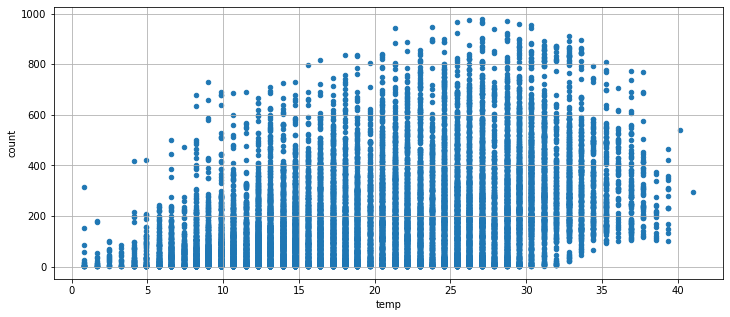

In [80]:
# scatter plot sxample
raw_fe.plot.scatter(y='count', x='temp', grid=True, figsize=(12,5))
plt.show()

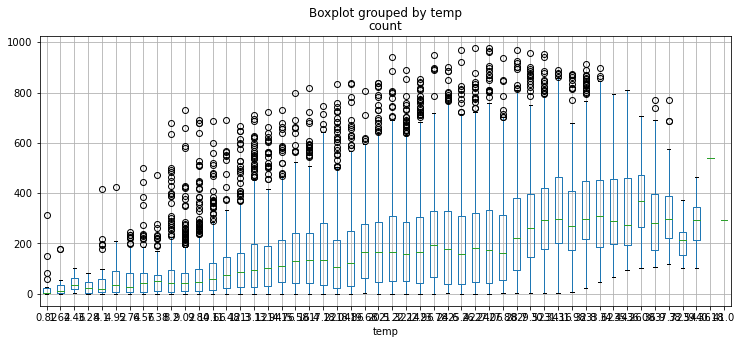

In [81]:
# box plot example
raw_fe.boxplot(column='count', by='temp', grid=True, figsize=(12,5))
plt.show()

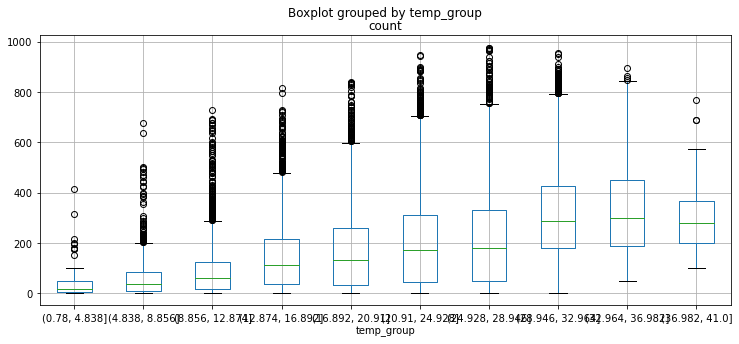

In [82]:
# box plot example
raw_fe.boxplot(column='count', by='temp_group', grid=True, figsize=(12,5))
plt.show()

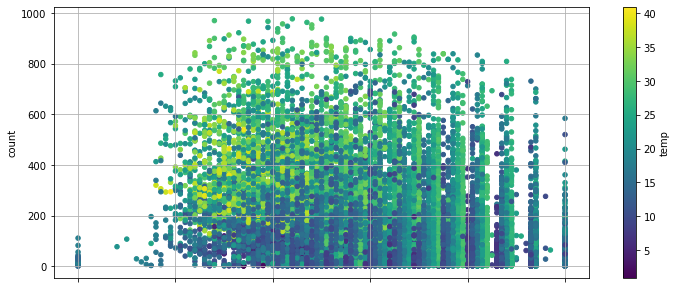

In [83]:
# scatter plot example
raw_fe.plot.scatter(y='count', x='humidity', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

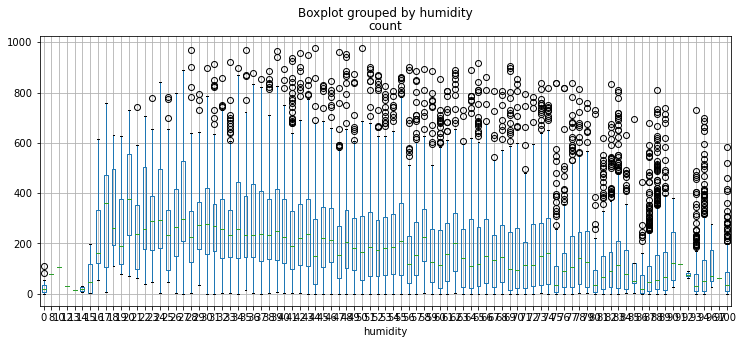

In [84]:
# box plot example
raw_fe.boxplot(column='count', by='humidity', grid=True, figsize=(12,5))
plt.show()

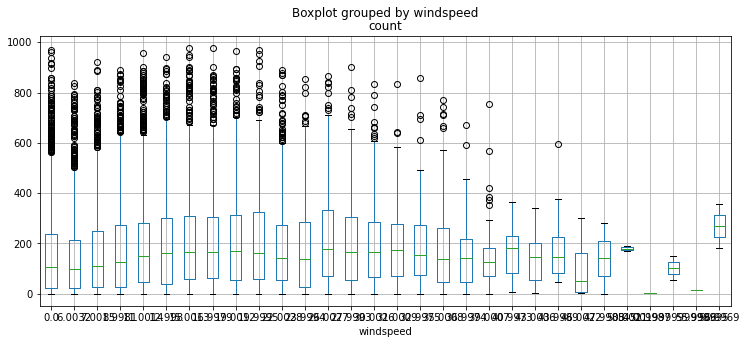

In [85]:
# box plot example
raw_fe.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
plt.show()

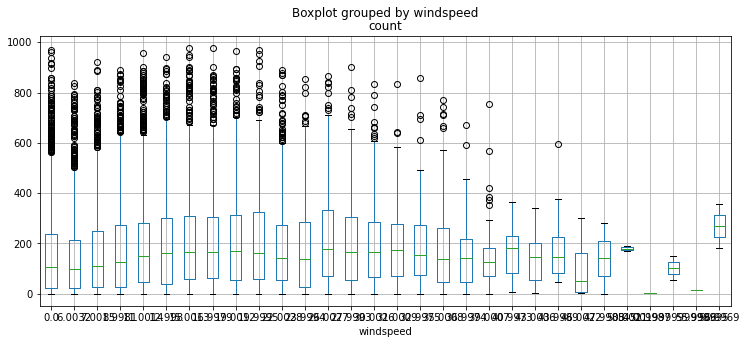

In [86]:
# box plot example
raw_fe.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
plt.show()

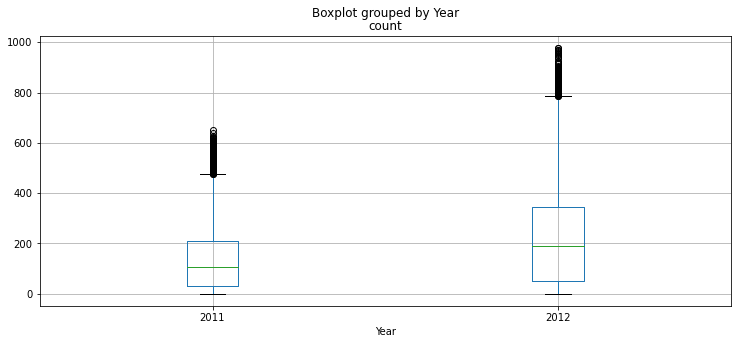

In [87]:
# box plot example
raw_fe.boxplot(column='count', by='Year', grid=True, figsize=(12,5))
plt.show()

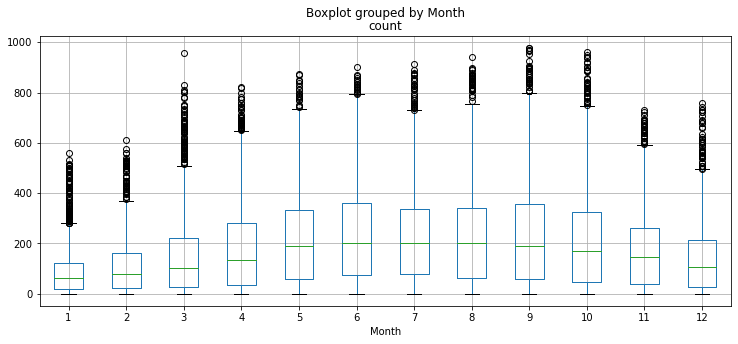

In [88]:
# box plot example
raw_fe.boxplot(column='count', by='Month', grid=True, figsize=(12,5))
plt.show()

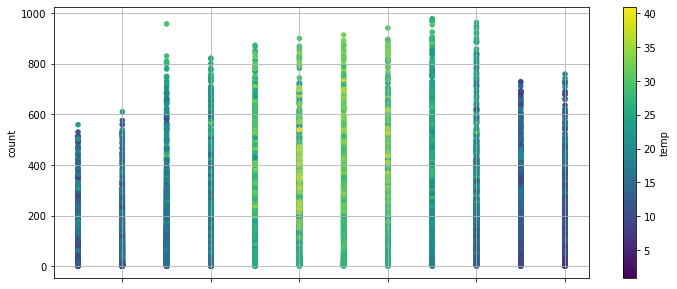

In [89]:
# scatter plot example
raw_fe.plot.scatter(y='count', x='Month', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

In [141]:
# pd.plotting.scatter_matrix(raw_fe, figsize=(18,18), diagonal='kde')
# plt.show()